In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 
               'fbs',
               'restecg', 'thalach', 'exang', 'oldpeak', 
               'slope',
               'ca', 'thal', 'HeartDisease']
raw_data = pd.read_excel('./datasets/heart-disease.xlsx',
                         header=None, names=column_name)
print(raw_data.head(20))

    age  sex  cp  treshbps chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0    63    1   1       145  233    1        2      150      0      2.3      3   
1    67    1   4       160  286    0        0      108      1      1.5      2   
2    67    1   4       120    ?    0        2      129      1      2.6      2   
3    37    1   3       130  250    0        0      187      0      3.5      3   
4    41    0   2       130  204    0        2      172      0      1.4      1   
5    56    1   2       120  236    0        0      178      0      0.8      1   
6    62    0   4       140  268    0        2      160      0      3.6      3   
7    57    0   4       120  354    0        0      163      1      0.6      1   
8    63    1   4       130  254    0        2      147      0      1.4      2   
9    53    1   4       140  203    1        2      155      1      3.1      3   
10   57    1   4       140  192    0        0      148      0      0.4      2   
11   56    0   2       140  

In [ ]:
print(raw_data.describe().T)  #T  행렬전환해서 보여줌

In [5]:
raw_data.info()   #none값은 없음
#다 숫자같아보이지만 object라는건 안에 ? 등의 문자가 포함되어있을 가능성이 매우 높음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [7]:
clean_data = raw_data.replace("?",np.nan)   #np.nan 인 이유는....?
clean_data = clean_data.dropna() #그 행을 지움  7개의 행이 사라짐
clean_data.info()   # 그 뒤에 info를 확인해보면 object가 사라진게 보임

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshbps      296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  thal          296 non-null    float64
 13  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB


In [8]:
keep = column_name.pop()    #pop쓰면 뒤에 컬럼만 튀어나오고 그게 전체 컬럼네임에서 사라지게 됨.
print(keep)
print(column_name)

HeartDisease
['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
training_data = clean_data[column_name]  #컬럼네임은 원래 리스트고
target = clean_data[[keep]]  #리스트로 감싸줘야 df로 출력됨

print(training_data)
print(target)

In [34]:
print(training_data['ca'].unique())

[0. 3. 2. 1.]


In [35]:
value_data = training_data[['age', 'treshbps', 'chol', 'thalach', 'oldpeak']]
print(value_data.head())

   age  treshbps   chol  thalach  oldpeak
0   63       145  233.0      150      2.3
1   67       160  286.0      108      1.5
3   37       130  250.0      187      3.5
4   41       130  204.0      172      1.4
5   56       120  236.0      178      0.8


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(value_data)   #스케일러 하는 순간 인덱스가 잘 정리되어짐
value_data = pd.DataFrame(scaled_data, columns=value_data.columns)
print(value_data.describe())

                age      treshbps          chol       thalach       oldpeak
count  2.960000e+02  2.960000e+02  2.960000e+02  2.960000e+02  2.960000e+02
mean   4.500904e-18  6.067781e-16  1.997276e-17  6.458797e-16 -7.951597e-17
std    1.001693e+00  1.001693e+00  1.001693e+00  1.001693e+00  1.001693e+00
min   -2.826856e+00 -2.125838e+00 -2.335451e+00 -3.433796e+00 -9.033993e-01
25%   -7.205712e-01 -6.610293e-01 -7.004143e-01 -6.948401e-01 -9.033993e-01
50%    1.662857e-01 -9.764125e-02 -8.487113e-02  1.453973e-01 -2.153165e-01
75%    7.205712e-01  4.657468e-01  5.547167e-01  7.128304e-01  4.727664e-01
max    2.494285e+00  3.846075e+00  6.089796e+00  2.284183e+00  4.429243e+00


In [37]:
training_data.drop(['age', 'treshbps', 'chol', 'thalach', 'oldpeak'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
print(training_data)

     sex  cp  fbs  restecg  exang  slope   ca  thal
0      1   1    1        2      0      3  0.0   6.0
1      1   4    0        0      1      2  3.0   3.0
3      1   3    0        0      0      3  0.0   3.0
4      0   2    0        2      0      1  0.0   3.0
5      1   2    0        0      0      1  0.0   3.0
..   ...  ..  ...      ...    ...    ...  ...   ...
297    0   4    0        0      1      2  0.0   7.0
298    1   1    0        0      0      2  0.0   7.0
299    1   4    1        0      0      2  2.0   7.0
300    1   4    0        0      1      2  1.0   7.0
301    0   2    0        2      0      2  1.0   3.0

[296 rows x 8 columns]


In [39]:
onehot_data = pd.get_dummies(training_data, columns = training_data.columns)
print(onehot_data.head())

   sex_0  sex_1  cp_1  cp_2  cp_3  cp_4  fbs_0  fbs_1  restecg_0  restecg_1  \
0      0      1     1     0     0     0      0      1          0          0   
1      0      1     0     0     0     1      1      0          1          0   
3      0      1     0     0     1     0      1      0          1          0   
4      1      0     0     1     0     0      1      0          0          0   
5      0      1     0     1     0     0      1      0          1          0   

   ...  slope_1  slope_2  slope_3  ca_0.0  ca_1.0  ca_2.0  ca_3.0  thal_3.0  \
0  ...        0        0        1       1       0       0       0         0   
1  ...        0        1        0       0       0       0       1         1   
3  ...        0        0        1       1       0       0       0         1   
4  ...        1        0        0       1       0       0       0         1   
5  ...        1        0        0       1       0       0       0         1   

   thal_6.0  thal_7.0  
0         1         0  
1 

In [40]:
print(onehot_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sex_0      296 non-null    uint8
 1   sex_1      296 non-null    uint8
 2   cp_1       296 non-null    uint8
 3   cp_2       296 non-null    uint8
 4   cp_3       296 non-null    uint8
 5   cp_4       296 non-null    uint8
 6   fbs_0      296 non-null    uint8
 7   fbs_1      296 non-null    uint8
 8   restecg_0  296 non-null    uint8
 9   restecg_1  296 non-null    uint8
 10  restecg_2  296 non-null    uint8
 11  exang_0    296 non-null    uint8
 12  exang_1    296 non-null    uint8
 13  slope_1    296 non-null    uint8
 14  slope_2    296 non-null    uint8
 15  slope_3    296 non-null    uint8
 16  ca_0.0     296 non-null    uint8
 17  ca_1.0     296 non-null    uint8
 18  ca_2.0     296 non-null    uint8
 19  ca_3.0     296 non-null    uint8
 20  thal_3.0   296 non-null    uint8
 21  thal_6.0   296 n

In [43]:
onehot_data.reset_index(drop=True, inplace=True)  #onehot_data는 인덱스가 정리가 안되어있어서 한 번 정리가 필요함

In [44]:
training_data = pd.concat((onehot_data, value_data), axis=1)
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex_0      296 non-null    uint8  
 1   sex_1      296 non-null    uint8  
 2   cp_1       296 non-null    uint8  
 3   cp_2       296 non-null    uint8  
 4   cp_3       296 non-null    uint8  
 5   cp_4       296 non-null    uint8  
 6   fbs_0      296 non-null    uint8  
 7   fbs_1      296 non-null    uint8  
 8   restecg_0  296 non-null    uint8  
 9   restecg_1  296 non-null    uint8  
 10  restecg_2  296 non-null    uint8  
 11  exang_0    296 non-null    uint8  
 12  exang_1    296 non-null    uint8  
 13  slope_1    296 non-null    uint8  
 14  slope_2    296 non-null    uint8  
 15  slope_3    296 non-null    uint8  
 16  ca_0.0     296 non-null    uint8  
 17  ca_1.0     296 non-null    uint8  
 18  ca_2.0     296 non-null    uint8  
 19  ca_3.0     296 non-null    uint8  
 20  thal_3.0  

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    training_data, target, test_size=0.2)    #테스트 사이즈 20%로 설정 

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(236, 28) (236, 1)
(60, 28) (60, 1)


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [55]:
model = Sequential()
model.add(Dense(512, input_dim=28, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               14848     
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [56]:
model.compile(loss='mse', optimizer='adam',
              metrics=['binary_accuracy'])
fit_hist = model.fit(
    X_train, Y_train, batch_size=50, epochs=7,
    validation_split=0.2, verbose=1)

Epoch 1/7
4/4 [==============================] - 1s 120ms/step - loss: 0.2263 - binary_accuracy: 0.6330 - val_loss: 0.1892 - val_binary_accuracy: 0.7708
Epoch 2/7
4/4 [==============================] - 0s 27ms/step - loss: 0.1591 - binary_accuracy: 0.8191 - val_loss: 0.1474 - val_binary_accuracy: 0.8333
Epoch 3/7
4/4 [==============================] - 0s 20ms/step - loss: 0.1213 - binary_accuracy: 0.8245 - val_loss: 0.1390 - val_binary_accuracy: 0.7917
Epoch 4/7
4/4 [==============================] - 0s 27ms/step - loss: 0.1054 - binary_accuracy: 0.8511 - val_loss: 0.1483 - val_binary_accuracy: 0.7917
Epoch 5/7
4/4 [==============================] - 0s 26ms/step - loss: 0.0877 - binary_accuracy: 0.8883 - val_loss: 0.1431 - val_binary_accuracy: 0.8125
Epoch 6/7
4/4 [==============================] - 0s 15ms/step - loss: 0.0874 - binary_accuracy: 0.8777 - val_loss: 0.1507 - val_binary_accuracy: 0.7917
Epoch 7/7
4/4 [==============================] - 0s 15ms/step - loss: 0.0819 - binary_a

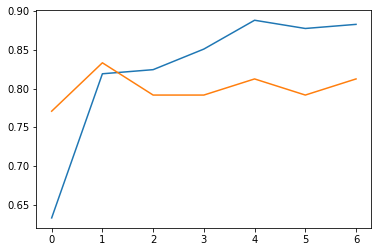

In [57]:
import matplotlib.pyplot as plt
plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

In [58]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('loss',score[0])
print('accuracy',score[1])

loss 0.12030290812253952
accuracy 0.8333333134651184
